# Assignment 5: Data Preparation

* Section: 01

* Name: Bryce Owen

* Due date:  March 25 2020

* Purpose:  Preparing data using standardization, categorization, binning, and outliers

## Working with the Data (Chapter 3)

#### 11. Derive an index field and add it to the dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bank_train = pd.read_csv("bank_marketing_training")
print(bank_train.shape)
bank_train['index'] = pd.Series(range(0,26874))
bank_train.head()

(26874, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4


#### 12. For the *days_since_previous* field, change the field value 999 to the appropriate code for missing values

In [19]:
import numpy as np
bank_train['days_since_previous'] = bank_train['days_since_previous'].replace({999:np.NaN})
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4


#### 13. For the *education* field, reexpress the field values as the numeric values shown in table 3.1

In [21]:
bank_train['education_numeric'] = bank_train['education']
dict_edu = {'education_numeric': {'illiterate': 0, 'basic.4y': 4, 'basic.6y': 6, 'basic.9y': 9, 'high.school': 12, 'professional.course': 12, 'university.degree': 16, 'unknown': np.NaN}}
bank_train.replace(dict_edu, inplace = True)
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index,education_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0,4.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1,12.0
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2,NaN
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3,12.0
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4,12.0


#### 14. Standardize the field *age*. Print out a list of the first 10 records, including the variables *age* and *age_z*

In [23]:
from scipy import stats

bank_train['age_z'] = stats.zscore(bank_train['age'])
bank_train.head(10)[['age','age_z']]

,age,age_z
0,56,1.539625
1,57,1.635778
2,41,0.097330
3,25,-1.441118
4,29,-1.056506
5,57,1.635778
6,35,-0.479588
7,39,-0.094976
8,30,-0.960353
9,55,1.443472


#### 15. Obtain a listing of all records that are outliers according to the field *age_z*. Print out a listing of the 10 largest *age_z* values

In [33]:
bank_train.query('age_z > 3 | age_z < -3')
bank_train_outliers = bank_train.query('age_z > 3 | age_z < -3')
bank_train_sort = bank_train_outliers.sort_values(['age_z'], ascending = False)
bank_train_sort.head(10)[['age_z']]

,age_z
24840,4.904980
24833,4.904980
26520,4.712674
26015,4.712674
23628,4.616521
25098,4.616521
26516,4.616521
26509,4.616521
18179,4.616521
18191,4.616521


#### 16. For the *job* field, combine the jobs with less than 5% of the records into a field called *other*

In [26]:
# UNSURE HOW TO COMPLETE 

job_count = (bank_train.groupby('job').count()['index']/bank_train.shape[0]) * 100
job_count = job_count.to_frame()
job_count[job_count['index'] < 5]

dict_job = {"job": {"entrepreneur": "other", "housemaid": "other", "retired": "other", "self-employed": "other", "student": "other", "unemployed": "other", "unknown": "other"}}
bank_train.replace(dict_job, inplace = True)
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index,age_z
0,56,other,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0,1.539625
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1,1.635778
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2,0.097330
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3,-1.441118
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4,-1.056506


#### 17. Rename the *default* predictor to *credit_default*

In [98]:
bank_train = bank_train.rename(columns={'default': 'credit_default'})
bank_train.head()

,age,job,marital,education,credit_default,housing,loan,contact,month,day_of_week,...,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index,education_numeric,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0,4.0,1.539625
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1,12.0,1.635778
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2,NaN,0.097330
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3,12.0,-1.441118
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4,12.0,-1.056506


#### 18. For the variable *month*, change the field values to 1-12, but keep the variable as categorical

In [106]:
bank_train['month'] = bank_train['month'].replace({'jan':'1', 'feb':'2','mar':'3','apr':'4','may':'5','jun':'6','jul':'7','aug':'8','sep':'9','oct':'10','nov':'11','dec':'12',})
bank_train.head()

,age,job,marital,education,credit_default,housing,loan,contact,month,day_of_week,...,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index,education_numeric,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0,4.0,1.539625
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1,12.0,1.635778
2,41,blue-collar,married,unknown,unknown,no,no,telephone,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2,NaN,0.097330
3,25,services,single,high.school,no,yes,no,telephone,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3,12.0,-1.441118
4,29,blue-collar,single,high.school,no,no,yes,telephone,5,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4,12.0,-1.056506


#### 19. Do the following for the *duration* field

   ##### a). Standardize the variable
    
   ##### b). Identify how many outliers there are and identify the most extreme outlier

In [123]:
bank_train['duration_z'] = stats.zscore(bank_train['duration'])

bank_train.query('duration_z > 3 | duration_z < -3')
bank_train_duration_outliers = bank_train.query('duration_z > 3 | duration_z < -3')
bank_train_duration_sort = bank_train_duration_outliers.sort_values(['duration_z'], ascending = False)
print('Number of outliers:', bank_train_duration_outliers.shape[0])
print('Most extreme outlier: ')
bank_train_duration_sort.head(1)[['duration_z']]

Number of outliers: 549
Most extreme outlier: 


,duration_z
15764,17.995198


#### 20. Do the following for the *campaign* field

   ##### a). Standardize the variable
    
   ##### b). Identify how many outliers there are and identify the most extreme outlier

In [122]:
bank_train['campaign_z'] = stats.zscore(bank_train['campaign'])

bank_train.query('campaign_z > 3 | campaign_z < -3')
bank_train_campaign_outliers = bank_train.query('campaign_z > 3 | campaign_z < -3')
bank_train_campaign_sort = bank_train_campaign_outliers.sort_values(['campaign_z'], ascending = False)
print('Number of outliers:', bank_train_campaign_outliers.shape[0])
print('Most extreme outlier: ')
bank_train_campaign_sort.head(1)[['campaign_z']]

Number of outliers: 548
Most extreme outlier: 


,campaign_z
12257,14.711334


## Working with the Data (Chapter 4)

#### 15. Create a bar graph of the *previous_outcome* variable, with *response* overlay

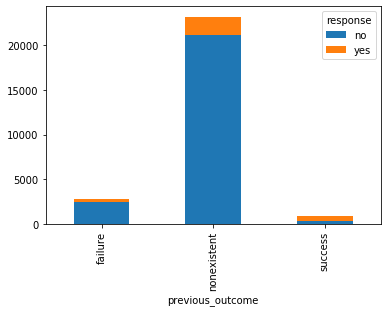

In [126]:
crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])
crosstab_01.plot(kind = 'bar', stacked = True)

#### 16. Create a normalized bar graph of *previous_outcome* variable with *response* overlay. Describe the relationship between *previous_outcome* and *response*

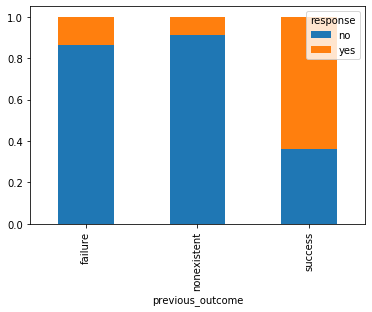

In [127]:
crosstab_normal = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_normal.plot(kind = 'bar', stacked = True)
# If the previous outcome was a success, then the respondant was more likely to respond. The inverse is also true.

#### 17. Create a contingency table of *previous_outcome* and *response*. Compare the contingency table with the non‐normalized bar graph and the normalized bar graph

In [128]:
crosstab_02 = pd.crosstab(bank_train['response'], bank_train['previous_outcome'])
round(crosstab_02.div(crosstab_02.sum(0), axis = 1)*100, 1)
#The contingency tabe and the normalized bar graph both look at response rates for each previous outcome and are the same values

previous_outcome,failure,nonexistent,success
response,,,
no,86.1,91.2,36.0
yes,13.9,8.8,64.0


#### 18. Create a histogram of *age* with *response* overlay

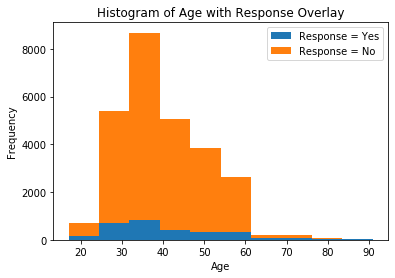

In [131]:
bank_train_age_yes = bank_train[bank_train.response == "yes"]['age']
bank_train_age_no = bank_train[bank_train.response == "no"]['age']
plt.hist([bank_train_age_yes, bank_train_age_no], bins = 10, stacked = True)
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Histogram of Age with Response Overlay')
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.show()

#### 19. Create a normalized histogram of *age* with *response* overlay. Describe the relationship between *age* and *response*

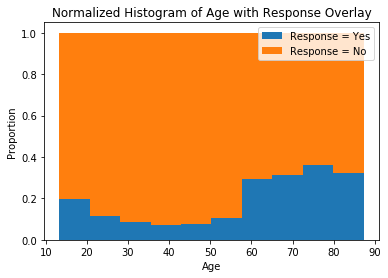

In [146]:

n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0], bottom = n_norm[:,0])
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Normalized Histogram of Age with Response Overlay')
plt.xlabel('Age'); plt.ylabel('Proportion'); plt.show()
# The overall number of responses was highest among the 30-60 age range, but the highest percentage of responses came form the 60-80 age group

#### 20. Bin the *age* variable using the bins specified in this chapter and create a bar chart of the binned *age* variable with *response* overlay

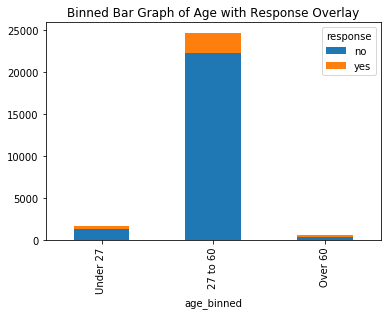

In [148]:
bank_train['age_binned'] = pd.cut(x = bank_train['age'], bins = [0, 27, 60.01, 100], labels=["Under 27", "27 to 60", "Over 60"], right = False)
crosstab_02 = pd.crosstab(bank_train['age_binned'], bank_train['response'])
crosstab_02.plot(kind='bar', stacked = True, title = 'Binned Bar Graph of Age with Response Overlay')

#### 21. "Produce the following graphs. What is the strength of each graph? Weakness?
   ##### a. Bar graph of marital
   ##### b. Bar graph of marital, with overlay of response
   ##### c. Normalized bar graph of marital, with overlay of response

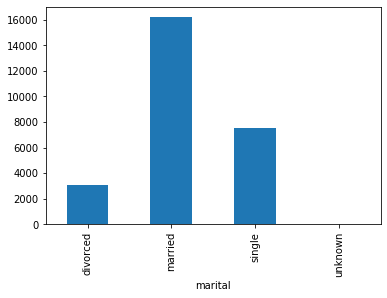

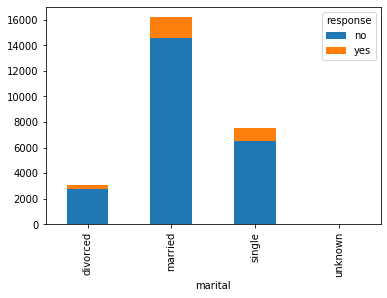

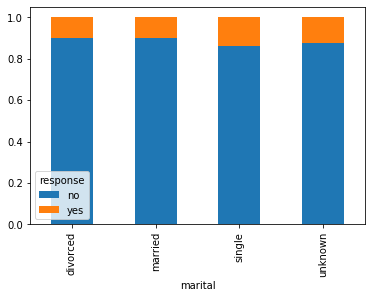

In [12]:
# A. Strength: shows the total number of people in each marital category. Weakness: Has no response data.
bank_train.groupby('marital')['index'].nunique().plot(kind='bar')
# B. Strength: shows the total number of people in each marital category plus responses vs non responses. Weakness: Does not show the response rate as a percentage of the group.
crosstab_01 = pd.crosstab(bank_train['marital'], bank_train['response'])
crosstab_01.plot(kind = 'bar', stacked = True)
# C. Strength: shows the percentage of each group that responded. Weakness: Does not show total amounts of responses in each group.
crosstab_normal = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_normal.plot(kind = 'bar', stacked = True)

#### 22. Use the graph from exercise 21c, describe the relationship between *marital* and *response*

In [ ]:
# There really is not any statistical difference between the response rates from different marital groups (~ 10% each)

#### 23. Do the following with the variables *marital* and *response*
   ##### a. Build a contingency table, being careful to have the correct variables representing the rows and columns. Report the counts and the column percentages
   ##### b. Describe what the contingency table is telling you

In [19]:
crosstab_03 = pd.crosstab(bank_train['response'], bank_train['marital'])
print('Crosstab counts:')
print(crosstab_03)
print('Crosstab percentages: ')
print(round(crosstab_03.div(crosstab_03.sum(0), axis = 1)*100, 1))
# B. The contingency tables are giving us the counted responses and counted response rate respectively for each marital status

Crosstab counts:
marital   divorced  married  single  unknown
response                                    
no            2743    14579    6514       50
yes            312     1608    1061        7
Crosstab percentages: 
marital   divorced  married  single  unknown
response                                    
no            89.8     90.1    86.0     87.7
yes           10.2      9.9    14.0     12.3
